# NLP: Song Lyrics Classification

## Goal

Classify a song lyric to an artist.

In [1]:
import json

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split#, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_confusion_matrix, classification_report

## Load Data

In [4]:
json_files = [
    "data/lyrics_james_brown.json"
    ,"data/lyrics_stevie_wonder.json"
    #,"data/lyrics_credence_clearwater_revival.json"
    #,"data/lyrics_nick_drake.json"
    #,"data/lyrics_zero_7.json"
]

In [5]:
lyrics = []
for json_file in json_files:
    with open(json_file, encoding='ascii') as file:
        lyrics.extend(json.load(file))

In [6]:
#print(lyrics[0]['song_title'], '', lyrics[0]['lyrics'][:300]+'...', sep='\n')

In [7]:
df = pd.DataFrame(data=lyrics)
df.drop(['artist_searched'], axis=1, inplace=True)
df.head()

,artist_found,song_title,lyrics
0,James Brown,Stubborn Kind of Fellow,"Ah say yeah yeah yeah, say yeah yeah yeah\nAh ..."
1,James Brown,"Baby, You're Right","You think I love you\nWell, baby, you're right..."
2,James Brown,Make It Funky,(Bobby asks) \nWhat you gonna play now? \n(Jam...
3,James Brown,I Got You (I Feel Good),"Whoa! I feel good, I knew that I would, now\nI..."
4,James Brown,Living in America,Super highways coast to coast just easy to get...


## Transform: Term Frequency-Inverse Document Frequency (TF-IDF)

In [8]:
corpus = df['lyrics']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [9]:
vectorizer.get_feature_names()[:15]

['05',
 '10',
 '15',
 '1959',
 '1987',
 '20',
 '20th',
 '21',
 '250',
 '2x',
 '30',
 '32',
 '40',
 '45',
 '84']

In [10]:
X[0].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [11]:
df_bow = pd.DataFrame(data=X.todense(), columns=vectorizer.get_feature_names())

In [12]:
df_bow.head()

,05,10,15,1959,1987,20,20th,21,250,2x,...,yours,yourself,yourselves,yow,yuletide,yup,zillion,zimbabwe,zippedy,zsa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

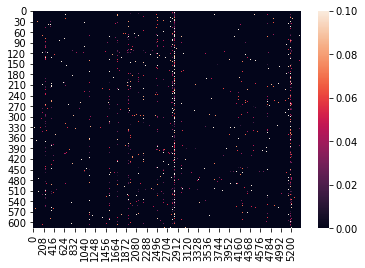

In [13]:
sns.heatmap(X.todense(), vmax=0.1)

In [14]:
assert len(df['artist_found'].unique()) == 2

## Train/Test split

Define X and y:

* X : Training data
* y : Target values

In [15]:
X = X
y = df['artist_found']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X.shape, X_train.shape, X_test.shape

((617, 5403), (462, 5403), (155, 5403))

## Modelling

### Logistic Regression

Class balancing using `class_weight='balanced'` was especially important here. Otherwise log reg predictet mostly one class for all!

In [17]:
m_logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
m_logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

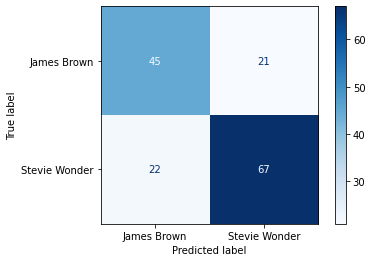

In [18]:
y_pred = m_logreg.predict(X_test)
plot_confusion_matrix(m_logreg, X_test, y_test, cmap='Blues')

In [19]:
print(classification_report(y_true=y_test, y_pred=y_pred))

               precision    recall  f1-score   support

  James Brown       0.67      0.68      0.68        66
Stevie Wonder       0.76      0.75      0.76        89

     accuracy                           0.72       155
    macro avg       0.72      0.72      0.72       155
 weighted avg       0.72      0.72      0.72       155

